In [1]:
from Bandit import *

In [2]:
Bandit_Reward = [1,2,3,4]
NumberOfTrials = 20000
eps = 0.1

In [3]:
egreedy = EpsilonGreedy(Bandit)
egreedy_rewards, num_times_explored, num_times_exploited, num_optimal = egreedy.experiment(Bandit_Reward, 10, NumberOfTrials)

optimal bandit index: 3
Estimated average reward: epsilon = 4.9975012493753125e-05: [-0.197, 2.03, 2.993, 0]


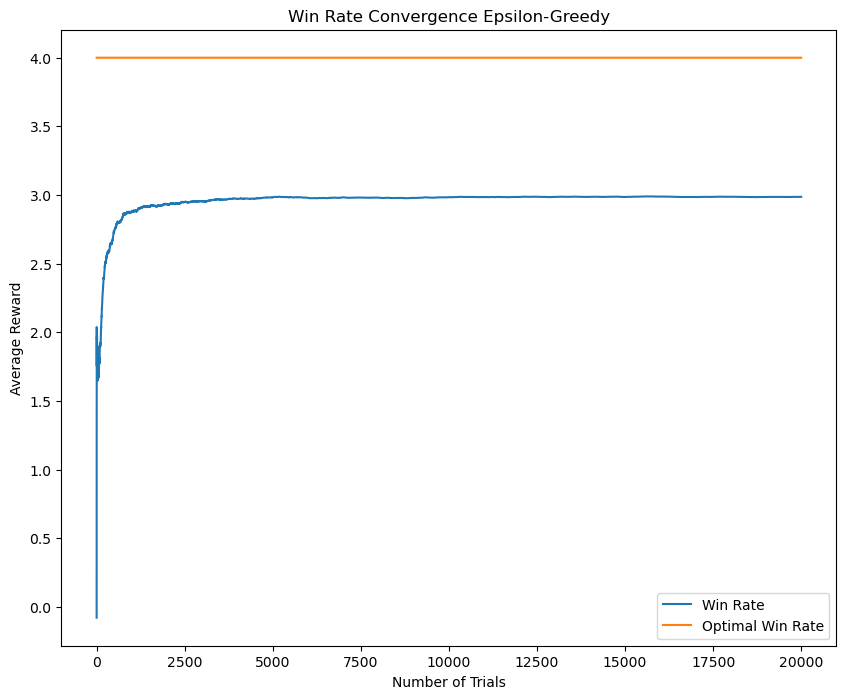

In [4]:
egreedy.plot_learning_process(Bandit_Reward, egreedy_rewards, NumberOfTrials)

In [5]:
df = egreedy.report(egreedy_rewards, num_times_explored, num_times_exploited, num_optimal, NumberOfTrials)


Total Reward Earned: 59736.46148595687
Average Reward: 2.986823074297843
Overall Win Rate: 2.9868
# of explored: 5
# of exploited: 19995
# of times selected the optimal bandit: 0


In [6]:
egreedy_cumulative_rewards = egreedy_rewards.cumsum()
print("Epsilon Greedy Cumulative Reward:", max(egreedy_cumulative_rewards))

Epsilon Greedy Cumulative Reward: 59736.461485957174


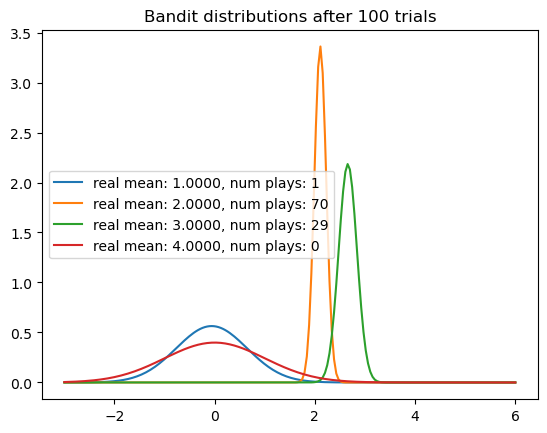

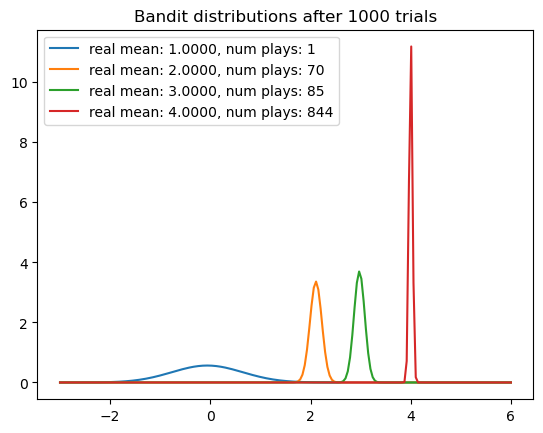

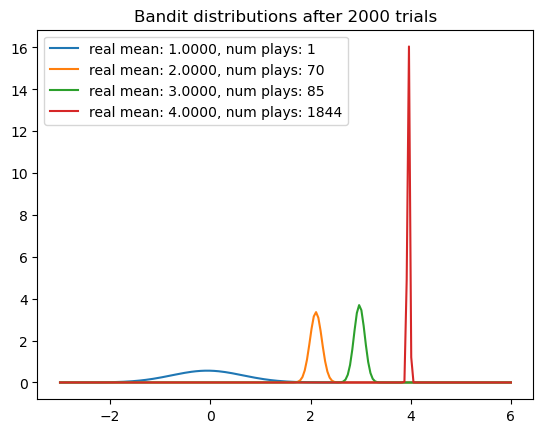

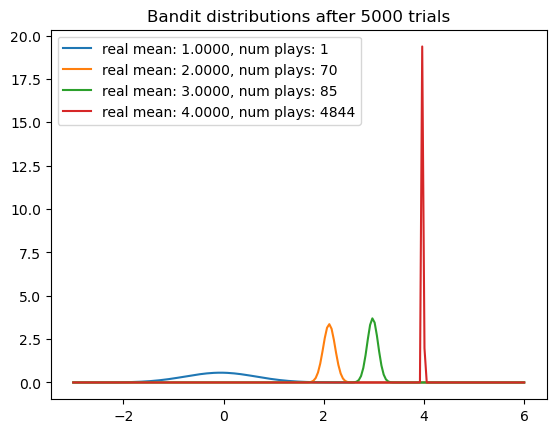

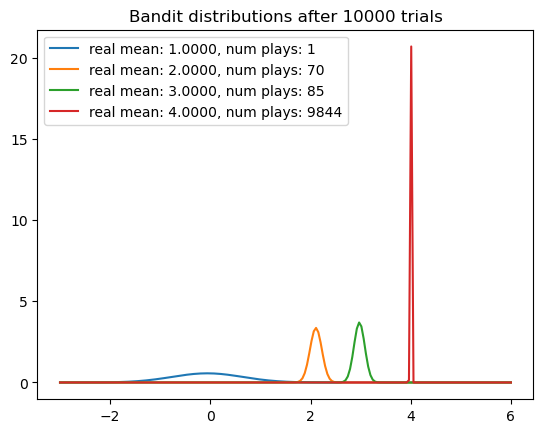

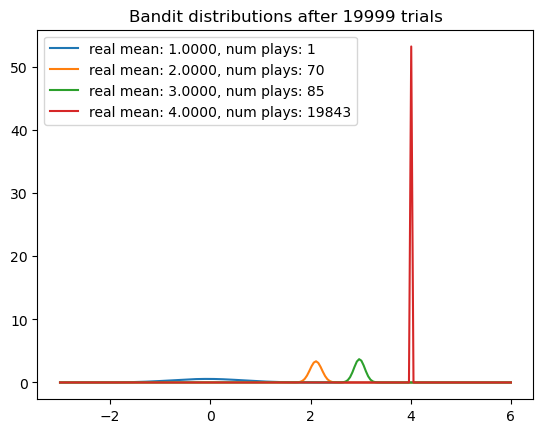

In [7]:
thompson = ThompsonSampling(Bandit)
bandits, thompson_rewards = thompson.experiment(Bandit_Reward, NumberOfTrials)

In [8]:
thompson_cumulative_rewards = thompson_rewards.cumsum()

print("Thompson Sampling Cumulative Reward:", max(thompson_cumulative_rewards))

optimal_reward = max(max(egreedy_rewards), max(thompson_rewards))

# Calculate cumulative regret for Epsilon Greedy
egreedy_rewards_ = optimal_reward - egreedy_rewards
epsilon_greedy_cumulative_regret = egreedy_rewards_.cumsum()

# Calculate cumulative regret for Thompson Sampling
thompson_rewards_ = optimal_reward - thompson_rewards
thompson_sampling_cumulative_regret = thompson_rewards_.cumsum()

print("Epsilon Greedy Cumulative Regret:", epsilon_greedy_cumulative_regret[-1])
print("Thompson Sampling Cumulative Regret:", thompson_sampling_cumulative_regret[-1])

Thompson Sampling Cumulative Reward: 80030.18925477855
Epsilon Greedy Cumulative Regret: 98915.91100010523
Thompson Sampling Cumulative Regret: 78622.18323128433


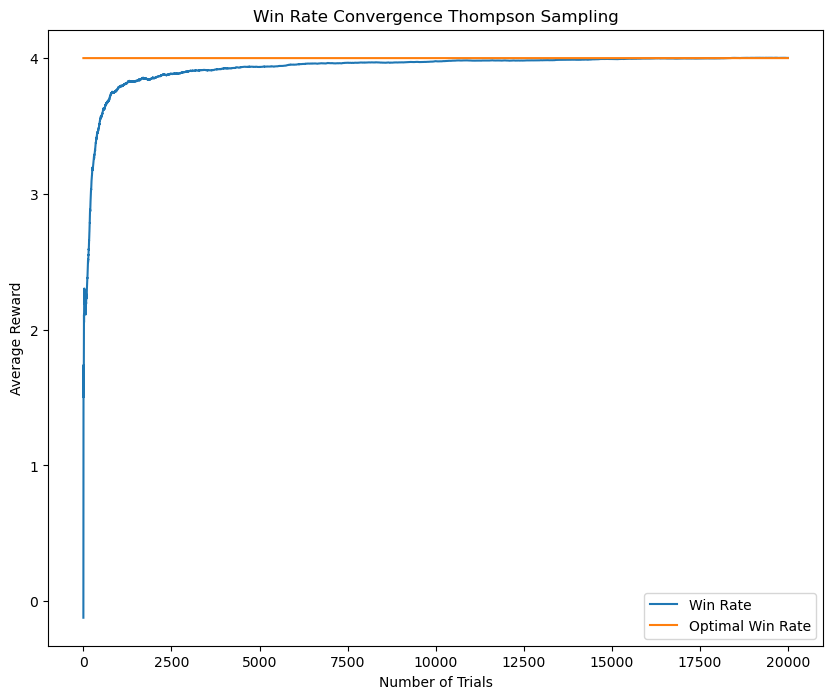

In [9]:
thompson.plot_learning_process(Bandit_Reward, thompson_rewards, NumberOfTrials)

In [10]:
df = thompson.report(bandits, thompson_rewards, NumberOfTrials)

Total Reward Earned: 80030.18925477819
Average Reward: 4.00150946273891
Overall Win Rate: 4.00150946273891
Number of times selected each bandit: [1, 70, 85, 19844]


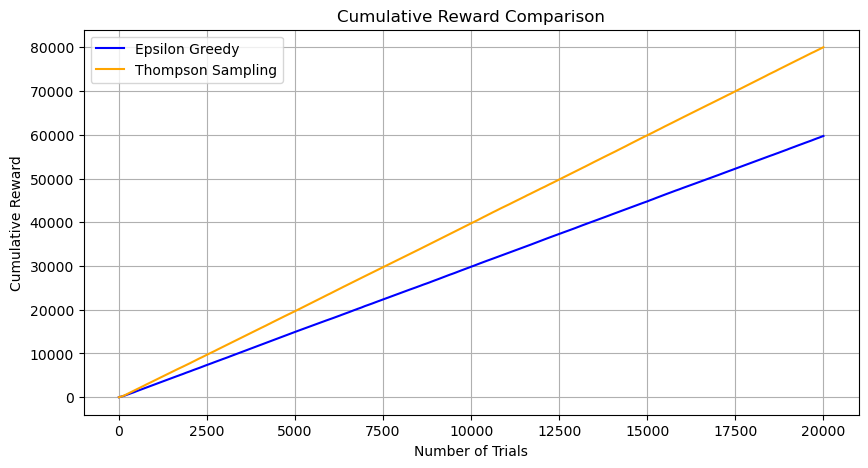

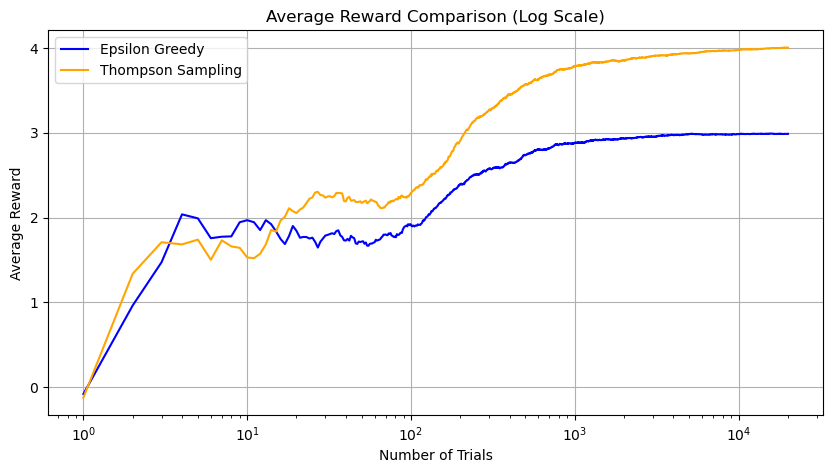

In [11]:
plot = Visualization()
plot.plot1(egreedy_rewards, thompson_rewards)

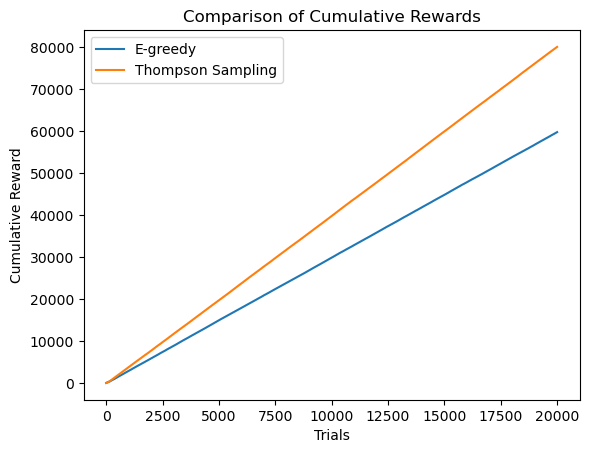

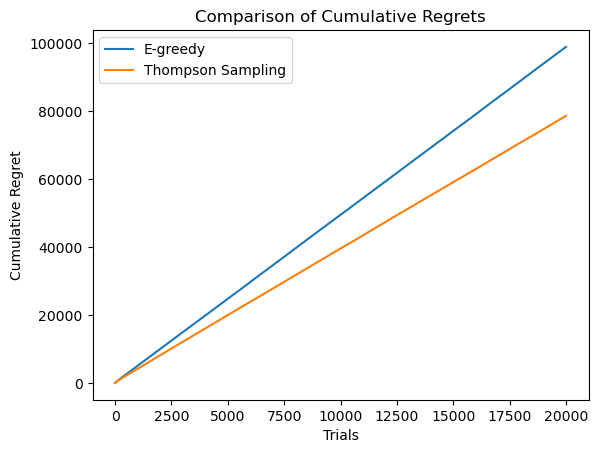

In [12]:
plot.plot2(egreedy_cumulative_rewards, thompson_cumulative_rewards, epsilon_greedy_cumulative_regret, thompson_sampling_cumulative_regret)